In [1]:
import os, sys
sys.path.append(os.path.abspath('../../'))
import pandas as pd
import numpy as np
from EMAWorkbench import load_results
from utils.rl.hv import HyperVolume

def compute_hypervolume(df, antiutopia, utopia):
    array = df.values
    hv_computer = HyperVolume(antiutopia, utopia)
    return hv_computer.compute(array)

/Users/zppei/Documents/PhD-Project/code/Evolutionary/EMAWorkbench/em_framework/evaluators.py:21: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn(
/Users/zppei/Documents/PhD-Project/code/Evolutionary/EMAWorkbench/em_framework/optimization.py:48: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)


# Discrete Dam Problem

In [2]:
results_path='../../results/dam_discrete_performance_2/'
files=sorted(os.listdir(results_path))
files

['.DS_Store',
 'ea_1274569960',
 'ea_1350287007',
 'ea_1883682950',
 'ea_1926216712',
 'ea_2097286424',
 'ea_2523200676',
 'ea_2861224539',
 'ea_3087161096',
 'ea_3186775264',
 'ea_3624030427',
 'ea_3668976038',
 'ea_3690172787',
 'ea_3885705317',
 'ea_462638671',
 'ea_562732020',
 'ea_617160326',
 'ea_674137616',
 'ea_703574460',
 'ea_956500800',
 'ea_96930842',
 'nes_1274569960_13-03-2023-08-48_best.csv',
 'nes_1274569960_13-03-2023-08-48_high.csv',
 'nes_1350287007_13-03-2023-08-48_best.csv',
 'nes_1350287007_13-03-2023-08-48_high.csv',
 'nes_1883682950_13-03-2023-08-48_best.csv',
 'nes_1883682950_13-03-2023-08-48_high.csv',
 'nes_1926216712_13-03-2023-08-48_best.csv',
 'nes_1926216712_13-03-2023-08-48_high.csv',
 'nes_2097286424_13-03-2023-08-48_best.csv',
 'nes_2097286424_13-03-2023-08-48_high.csv',
 'nes_2523200676_13-03-2023-08-48_best.csv',
 'nes_2523200676_13-03-2023-08-48_high.csv',
 'nes_2861224539_13-03-2023-08-48_best.csv',
 'nes_2861224539_13-03-2023-08-49_high.csv',
 'ne

In [4]:
ea_hv = []
for i in range(1, 21):
    ea=[]
    ea_files = sorted(os.listdir(results_path + files[i]))
    for j in range(len(ea_files)):
        _, all_outcomes=load_results(results_path + files[i] + "/" + ea_files[j])
        all_outcomes=dict((k, np.mean(all_outcomes[k])) for k in ('upstream_flooding', 'water_demand'))
        ea.append(all_outcomes)
        # print(ea_files[j])
    ea=pd.DataFrame(ea)
    each_ea_hv = compute_hypervolume(ea, np.array([-1, -10]), np.array([0, -9]))
    ea_hv.append(each_ea_hv)
    print(files[i])
    # print(ea)
    print(each_ea_hv)
ea_hv = np.array(ea_hv)
print(ea_hv.mean())
print(ea_hv.std())

ea_1274569960
0.3999999999999999
ea_1350287007
0.3999999999999999
ea_1883682950
0.3999999999999999
ea_1926216712
0.3999999999999999
ea_2097286424
0.3913769457761283
ea_2523200676
0.3913769457761283
ea_2861224539
0.3999999999999999
ea_3087161096
0.3999999999999999
ea_3186775264
0.3913769457761283
ea_3624030427
0.3999999999999999
ea_3668976038
0.3999999999999999
ea_3690172787
0.3999999999999999
ea_3885705317
0.387421444
ea_462638671
0.3999999999999999
ea_562732020
0.3913769457761283
ea_617160326
0.3999999999999999
ea_674137616
0.3999999999999999
ea_703574460
0.3999999999999999
ea_956500800
0.3999999999999999
ea_96930842
0.39530040255596777
0.3974114814830241
0.004145636148517271


In [5]:
nes_hv = []
for i in range(21, 61, 2):
    path = files[i]
    nes = pd.read_csv(results_path + path)
    each_nes_hv = compute_hypervolume(nes, np.array([-1, -10]), np.array([0, -9]))
    nes_hv.append(each_nes_hv)
    print(path)
    # print(nes)
    print(each_nes_hv)
nes_hv = np.array(nes_hv)
print(nes_hv.mean())
print(nes_hv.std())

nes_1274569960_13-03-2023-08-48_best.csv
0.3884450415559678
nes_1350287007_13-03-2023-08-48_best.csv
0.3999999999999999
nes_1883682950_13-03-2023-08-48_best.csv
0.3999999999999999
nes_1926216712_13-03-2023-08-48_best.csv
0.3999999999999999
nes_2097286424_13-03-2023-08-48_best.csv
0.3999999999999999
nes_2523200676_13-03-2023-08-48_best.csv
0.3853004025559678
nes_2861224539_13-03-2023-08-48_best.csv
0.3999999999999999
nes_3087161096_13-03-2023-08-49_best.csv
0.39314463899999985
nes_3186775264_13-03-2023-08-49_best.csv
0.3999999999999999
nes_3624030427_13-03-2023-08-49_best.csv
0.3631446389999994
nes_3668976038_13-03-2023-08-49_best.csv
0.3999999999999999
nes_3690172787_13-03-2023-08-49_best.csv
0.3999999999999999
nes_3885705317_13-03-2023-08-49_best.csv
0.3999999999999999
nes_462638671_13-03-2023-08-49_best.csv
0.3999999999999999
nes_562732020_13-03-2023-08-49_best.csv
0.3884450415559678
nes_617160326_13-03-2023-08-50_best.csv
0.3999999999999999
nes_674137616_13-03-2023-08-50_best.csv
0.

In [6]:
repsep_hv = []
for i in range(61, 101, 2):
    path = files[i]
    repsep = pd.read_csv(results_path + path)
    each_repsep_hv = compute_hypervolume(repsep, np.array([-1, -10]), np.array([0, -9]))
    repsep_hv.append(each_repsep_hv)
    print(path)
    # print(repsep)
    print(each_repsep_hv)
repsep_hv = np.array(repsep_hv)
print(repsep_hv.mean())
print(repsep_hv.std())

repsep_1274569960_13-03-2023-08-50_best.csv
0.38999999999999996
repsep_1350287007_13-03-2023-08-50_best.csv
0.3999999999999999
repsep_1883682950_13-03-2023-08-50_best.csv
0.3999999999999999
repsep_1926216712_13-03-2023-08-50_best.csv
0.3537454441119352
repsep_2097286424_13-03-2023-08-51_best.csv
0.3999999999999999
repsep_2523200676_13-03-2023-08-51_best.csv
0.3884450415559677
repsep_2861224539_13-03-2023-08-51_best.csv
0.3884450415559677
repsep_3087161096_13-03-2023-08-51_best.csv
0.3999999999999999
repsep_3186775264_13-03-2023-08-51_best.csv
0.36844504155596747
repsep_3624030427_13-03-2023-08-51_best.csv
0.3999999999999999
repsep_3668976038_13-03-2023-08-51_best.csv
0.39314463899999985
repsep_3690172787_13-03-2023-08-51_best.csv
0.3999999999999999
repsep_3885705317_13-03-2023-08-52_best.csv
0.3884450415559677
repsep_462638671_13-03-2023-08-52_best.csv
0.3999999999999999
repsep_562732020_13-03-2023-08-52_best.csv
0.3999999999999999
repsep_617160326_13-03-2023-08-52_best.csv
0.399999999

In [10]:
ea=[]
ea_files = sorted(os.listdir(results_path + files[9]))
for i in range(len(ea_files)):
    _, all_outcomes=load_results(results_path + files[9] + "/" + ea_files[i])
    all_outcomes=dict((k, np.mean(all_outcomes[k])) for k in ('upstream_flooding', 'water_demand'))
    ea.append(all_outcomes)
    print(files[9] + "/" + ea_files[i])
ea=pd.DataFrame(ea)
each_ea_hv = compute_hypervolume(ea, np.array([-1, -10]), np.array([0, -9]))
ea = ea.rename(columns={"upstream_flooding": "utility", "water_demand": "reliability"})
ea["Algorithms"]="$\epsilon$-NSGA-II"
print(each_ea_hv)
ea

ea_3186775264/13-03-2023-08-54_0.tar.gz
ea_3186775264/13-03-2023-08-54_1.tar.gz
ea_3186775264/13-03-2023-08-54_2.tar.gz
ea_3186775264/13-03-2023-08-54_3.tar.gz
ea_3186775264/13-03-2023-08-54_4.tar.gz
0.3999999999999999


,utility,reliability,Algorithms
0,0.000000,-9.831446,$\epsilon$-NSGA-II
1,-0.237107,-9.631446,$\epsilon$-NSGA-II
2,-0.068554,-9.731446,$\epsilon$-NSGA-II
3,-0.505661,-9.531446,$\epsilon$-NSGA-II
4,-0.874214,-9.431446,$\epsilon$-NSGA-II


In [13]:
path = files[37]
nes = pd.read_csv(results_path + path)
nes_hv = compute_hypervolume(nes, np.array([-1, -10]), np.array([0, -9]))
nes["Algorithms"]="MO-NES"
print(path)
print(nes_hv)
nes

nes_3186775264_13-03-2023-08-49_best.csv
0.3999999999999999


,utility,reliability,Algorithms
0,-0.068554,-9.731446,MO-NES
1,-0.505661,-9.531446,MO-NES
2,0.000000,-9.831446,MO-NES
3,-0.237107,-9.631446,MO-NES
4,-0.874214,-9.431446,MO-NES


In [15]:
path = files[77]
repsep = pd.read_csv(results_path + path)
repsep_hv = compute_hypervolume(repsep, np.array([-1, -10]), np.array([0, -9]))
repsep["Algorithms"]="MO-eREPS"
print(path)
print(repsep_hv)
repsep

repsep_3186775264_13-03-2023-08-51_best.csv
0.36844504155596747


,utility,reliability,Algorithms
0,-0.237107,-9.631446,MO-eREPS
1,-0.705661,-9.600000,MO-eREPS
2,-0.068554,-9.731446,MO-eREPS
3,0.000000,-9.831446,MO-eREPS
4,-0.874214,-9.431446,MO-eREPS


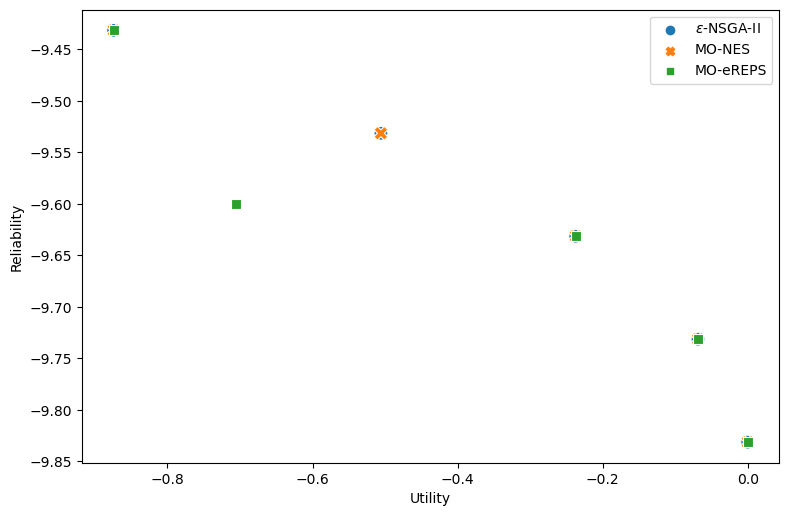

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.concat([ea, nes, repsep])
plt.figure(figsize=(9,6), dpi= 100)
sns.scatterplot(data=data, x="utility", y="reliability", hue="Algorithms", style="Algorithms", s=100)
plt.xlabel("Utility")
plt.ylabel("Reliability")
plt.legend()
plt.show()

In [17]:
results_path='../../results/dam_deep_performance_2/'
files=sorted(os.listdir(results_path))
files

['.DS_Store',
 'ea_10th_1274569960',
 'ea_10th_1350287007',
 'ea_10th_1883682950',
 'ea_10th_1926216712',
 'ea_10th_2097286424',
 'ea_10th_2523200676',
 'ea_10th_2861224539',
 'ea_10th_3087161096',
 'ea_10th_3186775264',
 'ea_10th_3624030427',
 'ea_10th_3668976038',
 'ea_10th_3690172787',
 'ea_10th_3885705317',
 'ea_10th_462638671',
 'ea_10th_562732020',
 'ea_10th_617160326',
 'ea_10th_674137616',
 'ea_10th_703574460',
 'ea_10th_956500800',
 'ea_10th_96930842',
 'ea_avg_1274569960',
 'ea_avg_1350287007',
 'ea_avg_1883682950',
 'ea_avg_1926216712',
 'ea_avg_2097286424',
 'ea_avg_2523200676',
 'ea_avg_2861224539',
 'ea_avg_3087161096',
 'ea_avg_3186775264',
 'ea_avg_3624030427',
 'ea_avg_3668976038',
 'ea_avg_3690172787',
 'ea_avg_3885705317',
 'ea_avg_462638671',
 'ea_avg_562732020',
 'ea_avg_617160326',
 'ea_avg_674137616',
 'ea_avg_703574460',
 'ea_avg_956500800',
 'ea_avg_96930842',
 'nes_10th_1274569960_13-03-2023-09-17_best.csv',
 'nes_10th_1274569960_13-03-2023-09-20_high.csv',
 '

In [18]:
ea_10th_hv=[]
ea_10th_std=[]
for i in range(1, 21):
    ea=[]
    ea_std=[]
    ea_files=sorted(os.listdir(results_path + files[i]))
    for j in range(len(ea_files)):
        _, all_outcomes=load_results(results_path + files[i] + "/" + ea_files[j])
        all_std_outcomes=[np.std(all_outcomes[k]) for k in ('upstream_flooding', 'water_demand')]
        all_outcomes=dict((k, np.mean(all_outcomes[k])) for k in ('upstream_flooding', 'water_demand'))
        ea.append(all_outcomes)
        ea_std.append(all_std_outcomes)
    ea=pd.DataFrame(ea)
    each_ea_10th_hv=compute_hypervolume(ea, np.array([-8, -12]), np.array([0, -8.5]))
    ea_10th_hv.append(each_ea_10th_hv)
    ea_10th_std.append(np.array(ea_std).mean(axis=0))
    print(files[i])
    # print(ea)
    print(each_ea_10th_hv)
ea_10th_hv=np.array(ea_10th_hv)
print(ea_10th_hv.mean())
print(ea_10th_hv.std())
ea_10th_std=np.array(ea_10th_std)
print(ea_10th_std.mean(axis=0))

ea_10th_1274569960
0.4460340541570668
ea_10th_1350287007
0.4897875759448401
ea_10th_1883682950
0.44890390296520283
ea_10th_1926216712
0.47328975073609736
ea_10th_2097286424
0.42542304634304484
ea_10th_2523200676
0.4836027855306684
ea_10th_2861224539
0.4209861096858498
ea_10th_3087161096
0.42981194849488435
ea_10th_3186775264
0.4845390461703196
ea_10th_3624030427
0.4672457132745069
ea_10th_3668976038
0.46159912963709615
ea_10th_3690172787
0.4595694416551649
ea_10th_3885705317
0.43161830482476204
ea_10th_462638671
0.4888776519306878
ea_10th_562732020
0.4516148719847994
ea_10th_617160326
0.46148377381883404
ea_10th_674137616
0.4702776411457669
ea_10th_703574460
0.4701750647538047
ea_10th_956500800
0.47008576432420673
ea_10th_96930842
0.4584534711152333
0.45966895242464184
0.02030836153477991
[0.67277605 0.87525465]


In [20]:
ea_10th_hv=[]
ea_10th_std=[]
for i in range(21, 41):
    ea=[]
    ea_std=[]
    ea_files=sorted(os.listdir(results_path + files[i]))
    for j in range(len(ea_files)):
        _, all_outcomes=load_results(results_path + files[i] + "/" + ea_files[j])
        all_std_outcomes=[np.std(all_outcomes[k]) for k in ('upstream_flooding', 'water_demand')]
        all_outcomes=dict((k, np.mean(all_outcomes[k])) for k in ('upstream_flooding', 'water_demand'))
        ea.append(all_outcomes)
        ea_std.append(all_std_outcomes)
    ea=pd.DataFrame(ea)
    each_ea_10th_hv=compute_hypervolume(ea, np.array([-8, -12]), np.array([0, -8.5]))
    ea_10th_hv.append(each_ea_10th_hv)
    ea_10th_std.append(np.array(ea_std).mean(axis=0))
    print(files[i])
    # print(ea)
    print(each_ea_10th_hv)
ea_10th_hv=np.array(ea_10th_hv)
print(ea_10th_hv.mean())
print(ea_10th_hv.std())
ea_10th_std=np.array(ea_10th_std)
print(ea_10th_std.mean(axis=0))

ea_avg_1274569960
0.501740863927372
ea_avg_1350287007
0.47531105154917114
ea_avg_1883682950
0.5181105798521037
ea_avg_1926216712
0.49825579814941645
ea_avg_2097286424
0.483971505968657
ea_avg_2523200676
0.5080648513522145
ea_avg_2861224539
0.47322087433610116
ea_avg_3087161096
0.5007634687022356
ea_avg_3186775264
0.509477288958927
ea_avg_3624030427
0.48918832999756906
ea_avg_3668976038
0.5160989715576955
ea_avg_3690172787
0.5176501073114628
ea_avg_3885705317
0.5245008558475919
ea_avg_462638671
0.47579823611644106
ea_avg_562732020
0.5218759538350121
ea_avg_617160326
0.48009007286874017
ea_avg_674137616
0.5241307467588884
ea_avg_703574460
0.4732825696138666
ea_avg_956500800
0.490976293476309
ea_avg_96930842
0.5343999680271216
0.5008454194103449
0.019194097673095763
[0.80072184 0.89178883]


In [21]:
nes_10th_hv = []
nes_10th_std = []
for i in range(41, 81, 2):
    path = files[i]
    nes = pd.read_csv(results_path + path)
    nes_std = nes.iloc[:, 2:]
    nes = nes.iloc[:, :2]
    each_nes_10th_hv = compute_hypervolume(nes, np.array([-8, -12]), np.array([0, -8.5]))
    nes_10th_hv.append(each_nes_10th_hv)
    nes_10th_std.append(np.array(nes_std.values).mean(axis=0))
    print(path)
    # print(nes)
    print(each_nes_10th_hv)
nes_10th_hv = np.array(nes_10th_hv)
nes_10th_std = np.array(nes_10th_std)
print(nes_10th_hv.mean())
print(nes_10th_hv.std())
print(nes_10th_std.mean(axis=0))

nes_10th_1274569960_13-03-2023-09-17_best.csv
0.6581368235448859
nes_10th_1350287007_13-03-2023-09-22_best.csv
0.6601656211414231
nes_10th_1883682950_13-03-2023-09-25_best.csv
0.675479384684161
nes_10th_1926216712_13-03-2023-09-29_best.csv
0.6588628159630068
nes_10th_2097286424_13-03-2023-09-33_best.csv
0.654122505138848
nes_10th_2523200676_13-03-2023-09-37_best.csv
0.6582293288881302
nes_10th_2861224539_13-03-2023-09-41_best.csv
0.659522362307734
nes_10th_3087161096_13-03-2023-09-45_best.csv
0.6577097321201306
nes_10th_3186775264_13-03-2023-09-49_best.csv
0.6607034823656461
nes_10th_3624030427_13-03-2023-09-53_best.csv
0.6620441417481494
nes_10th_3668976038_13-03-2023-09-57_best.csv
0.6608315956590738
nes_10th_3690172787_13-03-2023-10-01_best.csv
0.6587490870795973
nes_10th_3885705317_13-03-2023-10-04_best.csv
0.6638572417607137
nes_10th_462638671_13-03-2023-10-08_best.csv
0.65815804358201
nes_10th_562732020_13-03-2023-10-12_best.csv
0.6692498411893648
nes_10th_617160326_13-03-2023-10

In [22]:
nes_avg_hv = []
nes_avg_std = []
for i in range(81, 121, 2):
    path = files[i]
    nes = pd.read_csv(results_path + path)
    nes_std = nes.iloc[:, 2:]
    nes = nes.iloc[:, :2]
    each_nes_avg_hv = compute_hypervolume(nes, np.array([-8, -12]), np.array([0, -8.5]))
    nes_avg_hv.append(each_nes_avg_hv)
    nes_avg_std.append(np.array(nes_std.values).mean(axis=0))
    print(path)
    # print(nes)
    print(each_nes_avg_hv)
nes_avg_hv = np.array(nes_avg_hv)
nes_avg_std = np.array(nes_avg_std)
print(nes_avg_hv.mean())
print(nes_avg_hv.std())
print(nes_avg_std.mean(axis=0))

nes_avg_1274569960_13-03-2023-15-54_best.csv
0.6749527553291075
nes_avg_1350287007_13-03-2023-16-47_best.csv
0.659401515562329
nes_avg_1883682950_13-03-2023-16-51_best.csv
0.6740080557143421
nes_avg_1926216712_13-03-2023-16-55_best.csv
0.6773334515845253
nes_avg_2097286424_13-03-2023-16-58_best.csv
0.6576686932432831
nes_avg_2523200676_13-03-2023-17-02_best.csv
0.6582138700366906
nes_avg_2861224539_13-03-2023-17-06_best.csv
0.658647374678599
nes_avg_3087161096_13-03-2023-17-09_best.csv
0.6601944822211483
nes_avg_3186775264_13-03-2023-17-13_best.csv
0.6595993129395217
nes_avg_3624030427_13-03-2023-17-17_best.csv
0.6597688554373292
nes_avg_3668976038_13-03-2023-17-21_best.csv
0.6595757144923649
nes_avg_3690172787_13-03-2023-17-25_best.csv
0.6739207193688377
nes_avg_3885705317_13-03-2023-17-28_best.csv
0.65971500555454
nes_avg_462638671_13-03-2023-17-32_best.csv
0.6758279886161354
nes_avg_562732020_13-03-2023-17-36_best.csv
0.6753534819924941
nes_avg_617160326_13-03-2023-17-40_best.csv
0.

In [23]:
repsep_10th_hv = []
repsep_10th_std = []
for i in range(121, 161, 2):
    path = files[i]
    repsep = pd.read_csv(results_path + path)
    repsep_std = repsep.iloc[:, 2:]
    repsep = repsep.iloc[:, :2]
    each_repsep_10th_hv = compute_hypervolume(repsep, np.array([-8, -12]), np.array([0, -8.5]))
    repsep_10th_hv.append(each_repsep_10th_hv)
    repsep_10th_std.append(np.array(repsep_std.values).mean(axis=0))
    print(path)
    # print(repsep)
    print(each_repsep_10th_hv)
repsep_10th_hv = np.array(repsep_10th_hv)
repsep_10th_std = np.array(repsep_10th_std)
print(repsep_10th_hv.mean())
print(repsep_10th_hv.std())
print(repsep_10th_std.mean(axis=0))

repsep_10th_1274569960_13-03-2023-17-59_best.csv
0.6603751918268068
repsep_10th_1350287007_13-03-2023-18-03_best.csv
0.6567348518465548
repsep_10th_1883682950_13-03-2023-18-07_best.csv
0.656087476863796
repsep_10th_1926216712_13-03-2023-18-10_best.csv
0.6584676449903972
repsep_10th_2097286424_13-03-2023-18-14_best.csv
0.6603086718517007
repsep_10th_2523200676_13-03-2023-18-17_best.csv
0.6567500451416479
repsep_10th_2861224539_13-03-2023-18-21_best.csv
0.6568696627993275
repsep_10th_3087161096_13-03-2023-18-24_best.csv
0.659325060649139
repsep_10th_3186775264_13-03-2023-18-28_best.csv
0.6575820638559082
repsep_10th_3624030427_13-03-2023-18-31_best.csv
0.6554579299160765
repsep_10th_3668976038_13-03-2023-18-35_best.csv
0.6607292491989287
repsep_10th_3690172787_13-03-2023-18-38_best.csv
0.6576318357554057
repsep_10th_3885705317_13-03-2023-18-42_best.csv
0.6570021340595296
repsep_10th_462638671_13-03-2023-18-45_best.csv
0.6525179660754896
repsep_10th_562732020_13-03-2023-18-48_best.csv
0.6

In [24]:
repsep_avg_hv = []
repsep_avg_std = []
for i in range(161, 201, 2):
    path = files[i]
    repsep = pd.read_csv(results_path + path)
    repsep_std = repsep.iloc[:, 2:]
    repsep = repsep.iloc[:, :2]
    each_repsep_avg_hv = compute_hypervolume(repsep, np.array([-8, -12]), np.array([0, -8.5]))
    repsep_avg_hv.append(each_repsep_avg_hv)
    repsep_avg_std.append(np.array(repsep_std.values).mean(axis=0))
    print(path)
    # print(repsep)
    print(each_repsep_avg_hv)
repsep_avg_hv = np.array(repsep_avg_hv)
repsep_avg_std = np.array(repsep_avg_std)
print(repsep_avg_hv.mean())
print(repsep_avg_hv.std())
print(repsep_avg_std.mean(axis=0))

repsep_avg_1274569960_13-03-2023-19-09_best.csv
0.6614301931190686
repsep_avg_1350287007_13-03-2023-19-13_best.csv
0.6614767583466314
repsep_avg_1883682950_13-03-2023-19-16_best.csv
0.6604170293474176
repsep_avg_1926216712_13-03-2023-19-19_best.csv
0.6623540153509475
repsep_avg_2097286424_13-03-2023-19-37_best.csv
0.6770455596417642
repsep_avg_2523200676_13-03-2023-19-40_best.csv
0.6604525826961867
repsep_avg_2861224539_13-03-2023-19-44_best.csv
0.661596821012342
repsep_avg_3087161096_13-03-2023-19-47_best.csv
0.6776399645697129
repsep_avg_3186775264_13-03-2023-19-50_best.csv
0.6594823184872893
repsep_avg_3624030427_13-03-2023-19-54_best.csv
0.6614541853020788
repsep_avg_3668976038_13-03-2023-19-57_best.csv
0.6692644356375124
repsep_avg_3690172787_13-03-2023-20-01_best.csv
0.6766259850425524
repsep_avg_3885705317_13-03-2023-20-04_best.csv
0.6604371690933755
repsep_avg_462638671_13-03-2023-20-08_best.csv
0.672092054572154
repsep_avg_562732020_13-03-2023-20-11_best.csv
0.6754184166306418

In [26]:
ea=[]
ea_files = sorted(os.listdir(results_path + files[9]))
for i in range(len(ea_files)):
    _, all_outcomes=load_results(results_path + files[9] + "/" + ea_files[i])
    all_outcomes=dict((k, np.mean(all_outcomes[k])) for k in ('upstream_flooding', 'water_demand'))
    ea.append(all_outcomes)
    print(files[9] + "/" + ea_files[i])
ea=pd.DataFrame(ea)
each_ea_hv = compute_hypervolume(ea, np.array([-8, -12]), np.array([0, -8.5]))
ea["Algorithms"]="$\epsilon$-NSGA-II"
print(each_ea_hv)
ea

ea_10th_3186775264/13-03-2023-09-15_0.tar.gz
ea_10th_3186775264/13-03-2023-09-15_1.tar.gz
ea_10th_3186775264/13-03-2023-09-15_10.tar.gz
ea_10th_3186775264/13-03-2023-09-15_11.tar.gz
ea_10th_3186775264/13-03-2023-09-15_12.tar.gz
ea_10th_3186775264/13-03-2023-09-15_13.tar.gz
ea_10th_3186775264/13-03-2023-09-15_14.tar.gz
ea_10th_3186775264/13-03-2023-09-15_15.tar.gz
ea_10th_3186775264/13-03-2023-09-15_16.tar.gz
ea_10th_3186775264/13-03-2023-09-15_17.tar.gz
ea_10th_3186775264/13-03-2023-09-15_18.tar.gz
ea_10th_3186775264/13-03-2023-09-15_19.tar.gz
ea_10th_3186775264/13-03-2023-09-15_2.tar.gz
ea_10th_3186775264/13-03-2023-09-15_20.tar.gz
ea_10th_3186775264/13-03-2023-09-15_21.tar.gz
ea_10th_3186775264/13-03-2023-09-15_22.tar.gz
ea_10th_3186775264/13-03-2023-09-15_23.tar.gz
ea_10th_3186775264/13-03-2023-09-15_24.tar.gz
ea_10th_3186775264/13-03-2023-09-15_25.tar.gz
ea_10th_3186775264/13-03-2023-09-15_26.tar.gz
ea_10th_3186775264/13-03-2023-09-15_27.tar.gz
ea_10th_3186775264/13-03-2023-09-15_3

,upstream_flooding,water_demand,Algorithms
0,-3.848737,-10.074104,$\epsilon$-NSGA-II
1,-1.790092,-10.280877,$\epsilon$-NSGA-II
2,-3.978233,-9.910541,$\epsilon$-NSGA-II
3,-4.151989,-9.903729,$\epsilon$-NSGA-II
4,-3.051118,-10.098093,$\epsilon$-NSGA-II
5,-2.509011,-10.162074,$\epsilon$-NSGA-II
6,-1.700075,-10.342441,$\epsilon$-NSGA-II
7,-1.667850,-10.371102,$\epsilon$-NSGA-II
8,-1.714287,-10.333072,$\epsilon$-NSGA-II
9,-2.372047,-10.276825,$\epsilon$-NSGA-II


In [29]:
path = files[57]
nes = pd.read_csv(results_path + path)
nes = nes[['upstream_flooding', 'water_demand']]
nes_hv = compute_hypervolume(nes, np.array([-8, -12]), np.array([0, -8.5]))
nes["Algorithms"]="MO-NES"
print(path)
print(nes_hv)
nes

nes_10th_3186775264_13-03-2023-09-49_best.csv
0.6607034823656461


,upstream_flooding,water_demand,Algorithms
0,-2.840732,-9.335079,MO-NES
1,-2.658521,-9.350251,MO-NES
2,-3.988950,-9.158343,MO-NES
3,-1.609366,-10.367767,MO-NES
4,-2.075992,-9.619493,MO-NES
...,...,...,...
97,-2.817120,-9.336507,MO-NES
98,-5.220878,-8.965921,MO-NES
99,-1.607210,-10.432585,MO-NES
100,-1.877762,-9.799542,MO-NES


In [31]:
path = files[137]
repsep = pd.read_csv(results_path + path)
repsep = repsep[['upstream_flooding', 'water_demand']]
repsep_hv = compute_hypervolume(repsep, np.array([-8, -12]), np.array([0, -8.5]))
repsep["Algorithms"]="MO-eREPS"
print(path)
print(repsep_hv)
repsep

repsep_10th_3186775264_13-03-2023-18-28_best.csv
0.6575820638559082


,upstream_flooding,water_demand,Algorithms
0,-3.997161,-9.127052,MO-eREPS
1,-1.834977,-9.905281,MO-eREPS
2,-1.623349,-10.330093,MO-eREPS
3,-2.119663,-9.595220,MO-eREPS
4,-5.577528,-8.916608,MO-eREPS
...,...,...,...
96,-1.569785,-10.498355,MO-eREPS
97,-1.575393,-10.494360,MO-eREPS
98,-2.253160,-9.514830,MO-eREPS
99,-1.660033,-10.269864,MO-eREPS


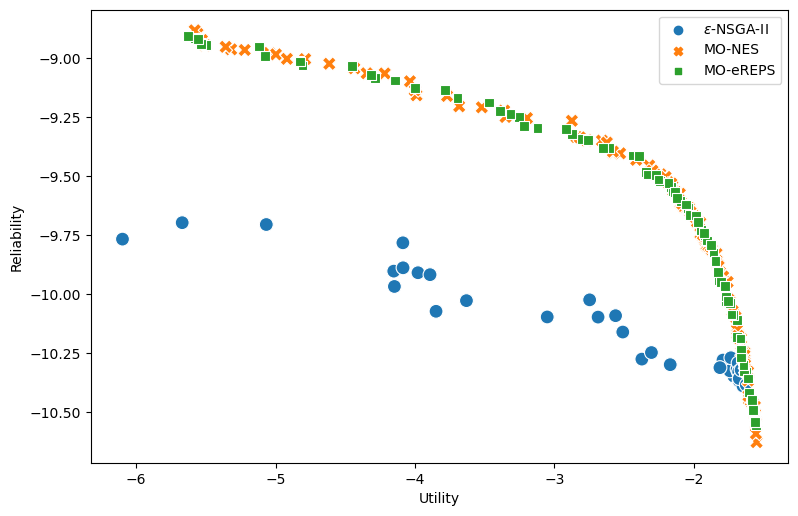

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.concat([ea, nes, repsep])
plt.figure(figsize=(9,6), dpi= 100)
sns.scatterplot(data=data, x="upstream_flooding", y="water_demand", hue="Algorithms", style="Algorithms", s=100)
plt.xlabel("Utility")
plt.ylabel("Reliability")
plt.legend()
plt.show()